In [3]:
#!pip install saxonche
#!pip install pathlib

import os
import pathlib
from pathlib import Path
import spacy
import re as regex
from saxonche import PySaxonProcessor
from os import getcwd

In [4]:
#nlp = spacy.cli.download("en_core_web_lg")
# ONLY NEED ABOVE LINE ONCE. REMEMBER: COMMENT OUT THE ABOVE LINE THE NEXT TIME YOU RUN THIS.
nlp = spacy.load('en_core_web_lg')

In [5]:
InputPath = 'JNscripts-xml'
OutputPath = 'testOutput' 

In [6]:
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from io import StringIO

In [12]:
def xqueryOverFiles(InputPath):
    # This time, let's try XQuery over a collection of files:
    with PySaxonProcessor(license=False) as proc:
        print(proc.version)
        xq = proc.new_xquery_processor()
        xq.set_query_base_uri(Path('.').absolute().as_uri() + '/')
        xq.set_query_content('''
let $futurama := collection('JNscripts-xml/?select=*.xml')
let $speakers := $futurama//speak/@who => distinct-values() => sort()
let $count := count($speakers)
for $sp in $speakers
    let $count := $futurama//speak[@who = $sp] => count()
    where $count > 100
    order by $count descending
    return ($sp || ',' || $count)
 
''')
        r = xq.run_query_to_value()
        return r
                            

xqueryOverFiles(InputPath)

SaxonC-HE 12.4.2 from Saxonica


"FRY,2684"
"BENDER,2360"
"LEELA,2117"
"FARNSWORTH,990"
"ZOIDBERG,581"
"AMY,499"
"HERMES,408"
"ZAPP,336"
"KIF,197"
"CALCULON,114"

SaxonC-HE 12.4.2 from Saxonica
['2684', '2360', '2117', '990', '581', '499', '408', '336', '197', '114']
['FRY', 'BENDER', 'LEELA', 'FARNSWORTH', 'ZOIDBERG', 'AMY', 'HERMES', 'ZAPP', 'KIF', 'CALCULON']


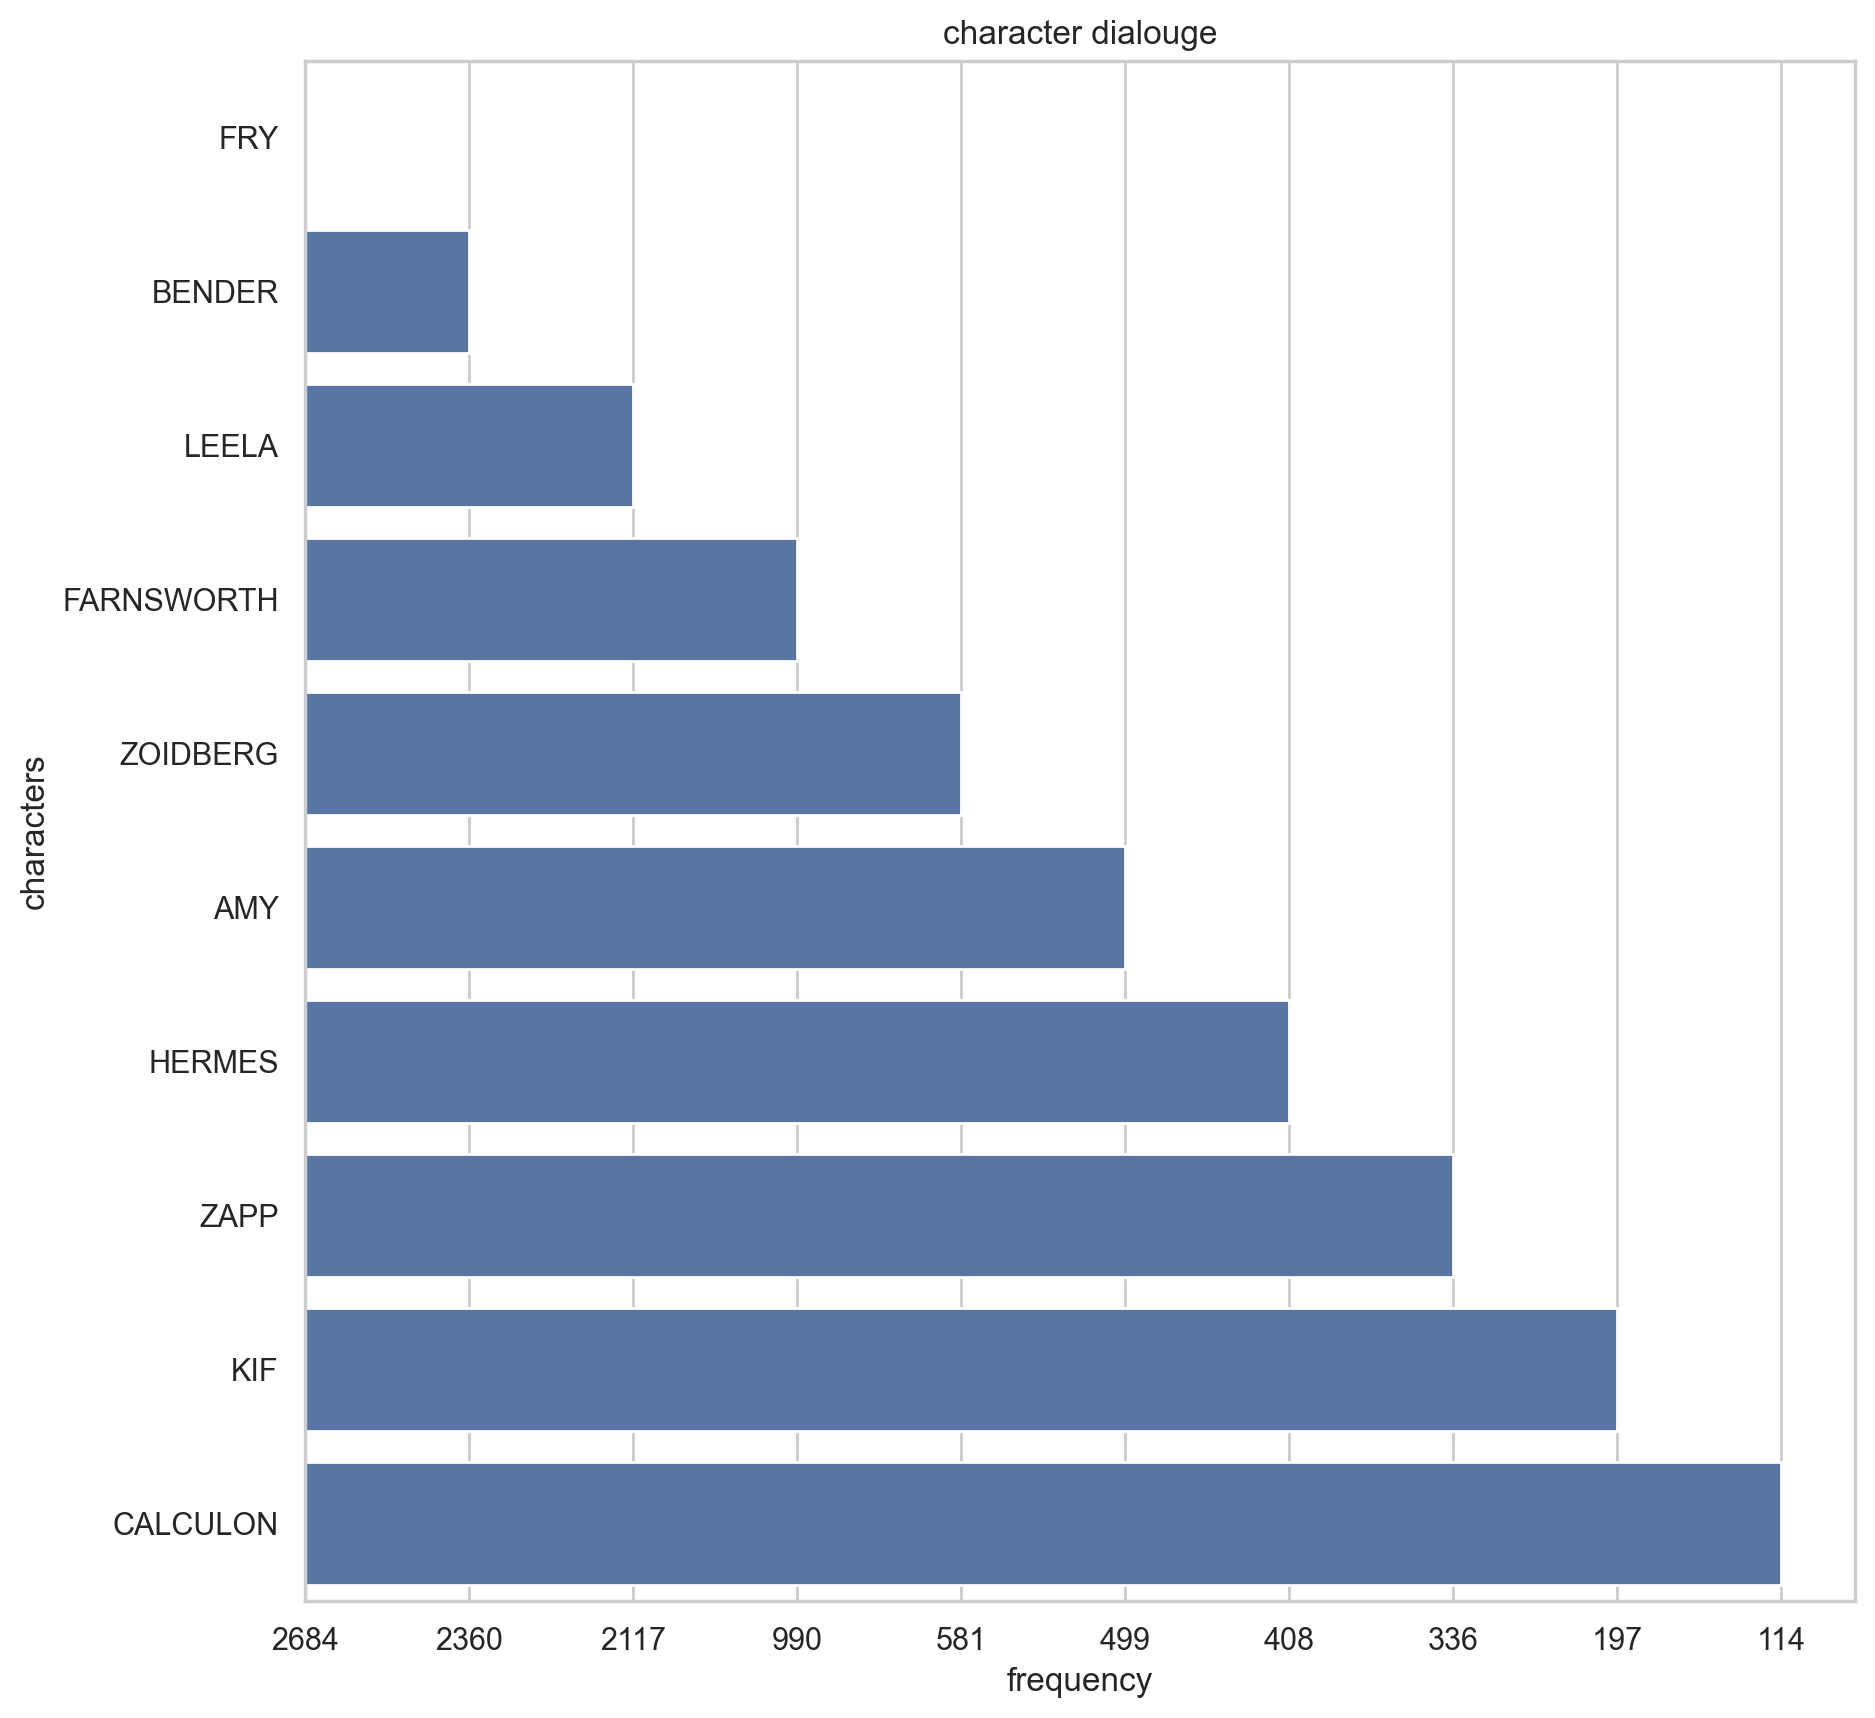

In [53]:
# The cell above gives you a simple csv. 
# You could save the output as a .csv file (but you may not need to)
# FIND OUT how to send comma-separated values to pandas dataframes
# Look up / find out how to use pandas dataframes to read the values in your csv, and send them to matplotlip and seaborn

results = xqueryOverFiles(InputPath)
keys = []
values = []
for i in range(results.size):
    keyAndValue = str(results[i]).split(",")
    keys.append(keyAndValue[0])
    values.append(keyAndValue[1])

counts = values
lems = keys
print(counts)
print(lems)
# This is to help matplotlib to display plots inline in the Jupyter Notebook
%matplotlib inline
# Set figure size configuration
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(10,10))

# Create bar plot using seaborn
sns.set(style="whitegrid")
sns.barplot(y=lems, x=counts,orient='h')
# ebb: We will try the dataframe structure with key value columns using data here, like this:
# sns.barplot(x='counts', y='lems', data=counts, palette="viridis", orient='h')

# Adding labels and title
plt.xlabel('frequency')
plt.ylabel('characters')
plt.title('character dialouge')

# Show plot
plt.show()